## Prepare funtions, libraries for report and metrics

In [386]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor as gbr

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




def get_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = get_rmse(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    return [mae, mse, rmse, r2_square]


def print_evaluate_r_square_mse_mae(X_test, y_test, gbr_y_pred):
    r_squared = gbr.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, gbr_y_pred)
    mae = metrics.mean_absolute_error(y_test, gbr_y_pred)
    print(f"R-squared value of GradientBoostingRegressor: {r_squared}")
    print(f"The mean squared error of GradientBoostingRegressor: {mse}")
    print(f"The mean absoluate error of GradientBoostingRegressor: {mae}")
    return [r_squared, mse, mae]


def show_df(
    title: str,
    columns: List[str],
    rows: List[list],
    label_x: str = "Metrics",
    label_y: str = "Value",
):
    width = 0.3
    x = np.arange(len(columns))
    fig, ax = plt.subplots(figsize=(10, 6))
    labels = ["Avocado"]

    rects1 = ax.bar(x, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x - width/2, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x + width/2, rows[1], width, label=labels[1])
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend(loc='upper left')

## Prepare DataFrame

In [387]:
df = pd.read_csv("FinalHW.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [388]:
df.shape

(18249, 14)

In [389]:

df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
TotalVolume     0
4046            0
4225            0
4770            0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

### region

In [390]:
df['region'].value_counts()

Albany                 338
NewYork                338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
Northeast              338
NewOrleansMobile       338
GrandRapids            338
BaltimoreWashington    338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
D

In [391]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [392]:
regions = df.region.unique()
average_price_by_region = {}
for region in regions:
    df_by_region = df[df['region'] == region]
    average_price = df_by_region["AveragePrice"].mean()
    average_price_by_region[region] = average_price

list(average_price_by_region.items())[:5]

[('Albany', 1.5610355029585798),
 ('Atlanta', 1.3391369047619048),
 ('BaltimoreWashington', 1.534230769230769),
 ('Boise', 1.3481360946745562),
 ('Boston', 1.530887573964497)]

In [393]:
def f(row):
    return average_price_by_region[row["region"]]
df['avg_price_by_region'] = df.apply (f, axis=1)
# df['avg_price_by_region'] = average_price_by_region[df['region']]
df_view = df.drop_duplicates (subset=['region', 'avg_price_by_region'])
df_view[["region", "avg_price_by_region"]].head()

,region,avg_price_by_region
0,Albany,1.561036
52,Atlanta,1.339137
104,BaltimoreWashington,1.534231
156,Boise,1.348136
208,Boston,1.530888


In [394]:
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,avg_price_by_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1.561036
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1.561036
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1.561036
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.561036
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.561036


In [395]:
y = df.iloc[:,2]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [396]:
df.drop(['4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'AveragePrice'], axis=1, inplace=True)
df.head()

,Unnamed: 0,Date,TotalVolume,TotalBags,type,year,region,avg_price_by_region
0,0,2015-12-27,64236.62,8696.87,conventional,2015,Albany,1.561036
1,1,2015-12-20,54876.98,9505.56,conventional,2015,Albany,1.561036
2,2,2015-12-13,118220.22,8145.35,conventional,2015,Albany,1.561036
3,3,2015-12-06,78992.15,5811.16,conventional,2015,Albany,1.561036
4,4,2015-11-29,51039.60,6183.95,conventional,2015,Albany,1.561036


### Date

In [397]:
type(df['Date'][0])

str

In [398]:
df['Date'] = pd.to_datetime(df['Date'])

In [399]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [400]:
df['Date'].head()

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date, dtype: datetime64[ns]

In [401]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [402]:
type(df['Date'])

pandas.core.series.Series

In [403]:
df.shape

(18246, 8)

In [404]:
list_months = []
indexes = df.index
for i in indexes:
    list_months.append(df['Date'][i].month)
df['month'] = list_months

In [405]:
df.drop(['Date', 'Unnamed: 0'], axis=1, inplace=True)

In [406]:

df['type'] = np.where(df['type']=="conventional", 0, 1)
df.head()

,TotalVolume,TotalBags,type,year,region,avg_price_by_region,month
0,64236.62,8696.87,0,2015,Albany,1.561036,12
1,54876.98,9505.56,0,2015,Albany,1.561036,12
2,118220.22,8145.35,0,2015,Albany,1.561036,12
3,78992.15,5811.16,0,2015,Albany,1.561036,12
4,51039.60,6183.95,0,2015,Albany,1.561036,11


In [407]:
df['year'].unique()

array([2015, 2016, 2017, 2018])

In [408]:
df['year'].value_counts()

2017    5721
2016    5616
2015    5613
2018    1296
Name: year, dtype: int64

In [409]:
df['year'] = df['year'].map({2017:0, 2016:1, 2015:2, 2018:3})

In [410]:
df['year'].unique()

array([2, 1, 0, 3])

In [411]:
df['year'].value_counts()

0    5721
1    5616
2    5613
3    1296
Name: year, dtype: int64

In [412]:
df.head()

,TotalVolume,TotalBags,type,year,region,avg_price_by_region,month
0,64236.62,8696.87,0,2,Albany,1.561036,12
1,54876.98,9505.56,0,2,Albany,1.561036,12
2,118220.22,8145.35,0,2,Albany,1.561036,12
3,78992.15,5811.16,0,2,Albany,1.561036,12
4,51039.60,6183.95,0,2,Albany,1.561036,11


In [413]:
df.drop(['region'], axis=1, inplace=True)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18246 entries, 0 to 18248
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalVolume          18246 non-null  float64
 1   TotalBags            18246 non-null  float64
 2   type                 18246 non-null  int64  
 3   year                 18246 non-null  int64  
 4   avg_price_by_region  18246 non-null  float64
 5   month                18246 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.5 MB


In [415]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df, y,test_size=0.2,random_state=42)

## Check by LinearRegression

In [416]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


LinearRegression_Yury = print_evaluate(y_test, y_pred)

MAE: 0.1983016623024057
MSE: 0.06789439167202878
RMSE: 0.26056552279998363
R2 Square 0.5638283725999438
______


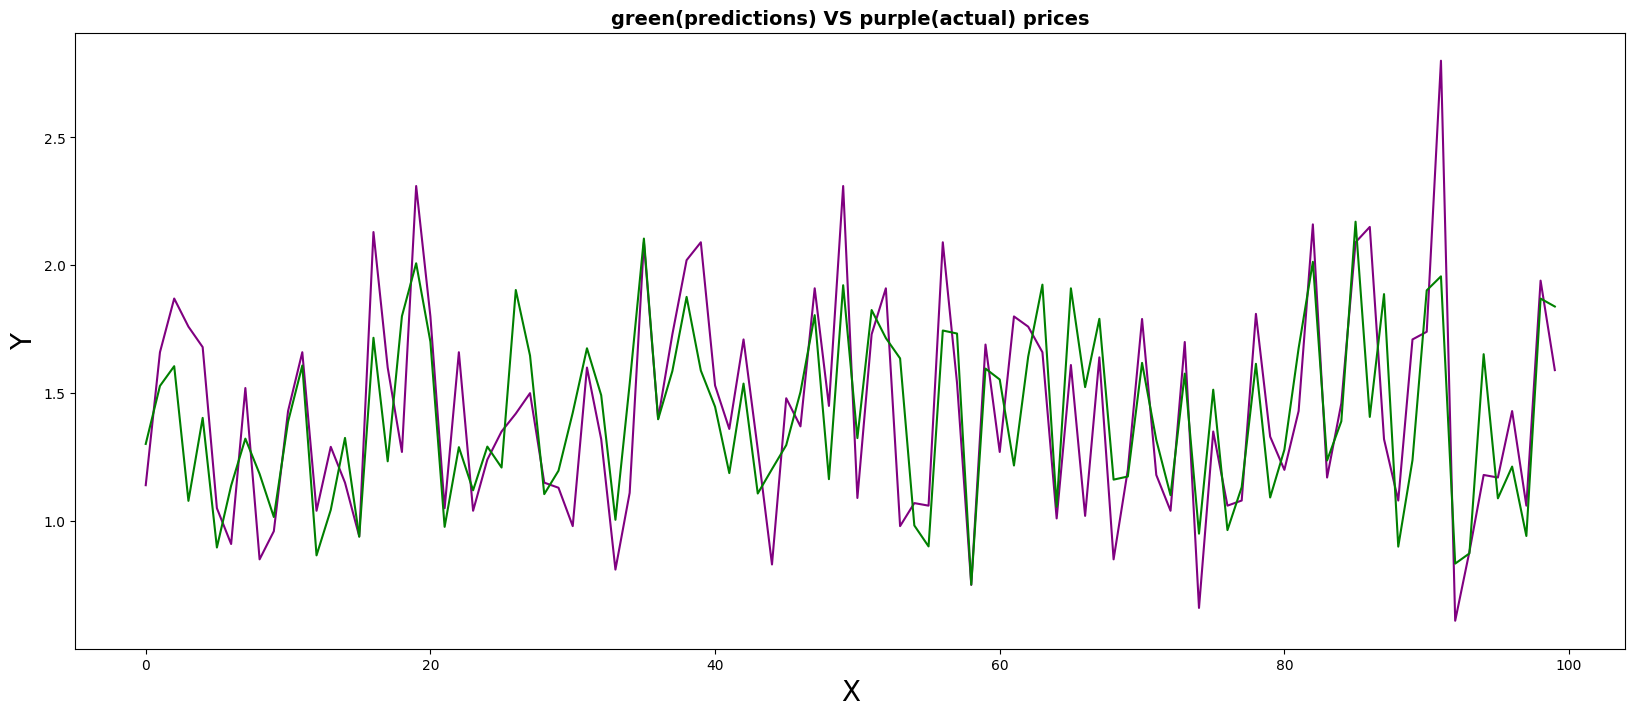

In [417]:
plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

## Check by GradientBoostingRegressor

In [418]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_pred = gbr.predict(X_test)

GradientBoostingRegressor_Yury = print_evaluate_r_square_mse_mae(X_test, y_test, gbr_y_pred)


R-squared value of GradientBoostingRegressor: 0.7416688627825745
The mean squared error of GradientBoostingRegressor: 0.04021177515802403
The mean absoluate error of GradientBoostingRegressor: 0.14810678059568708


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

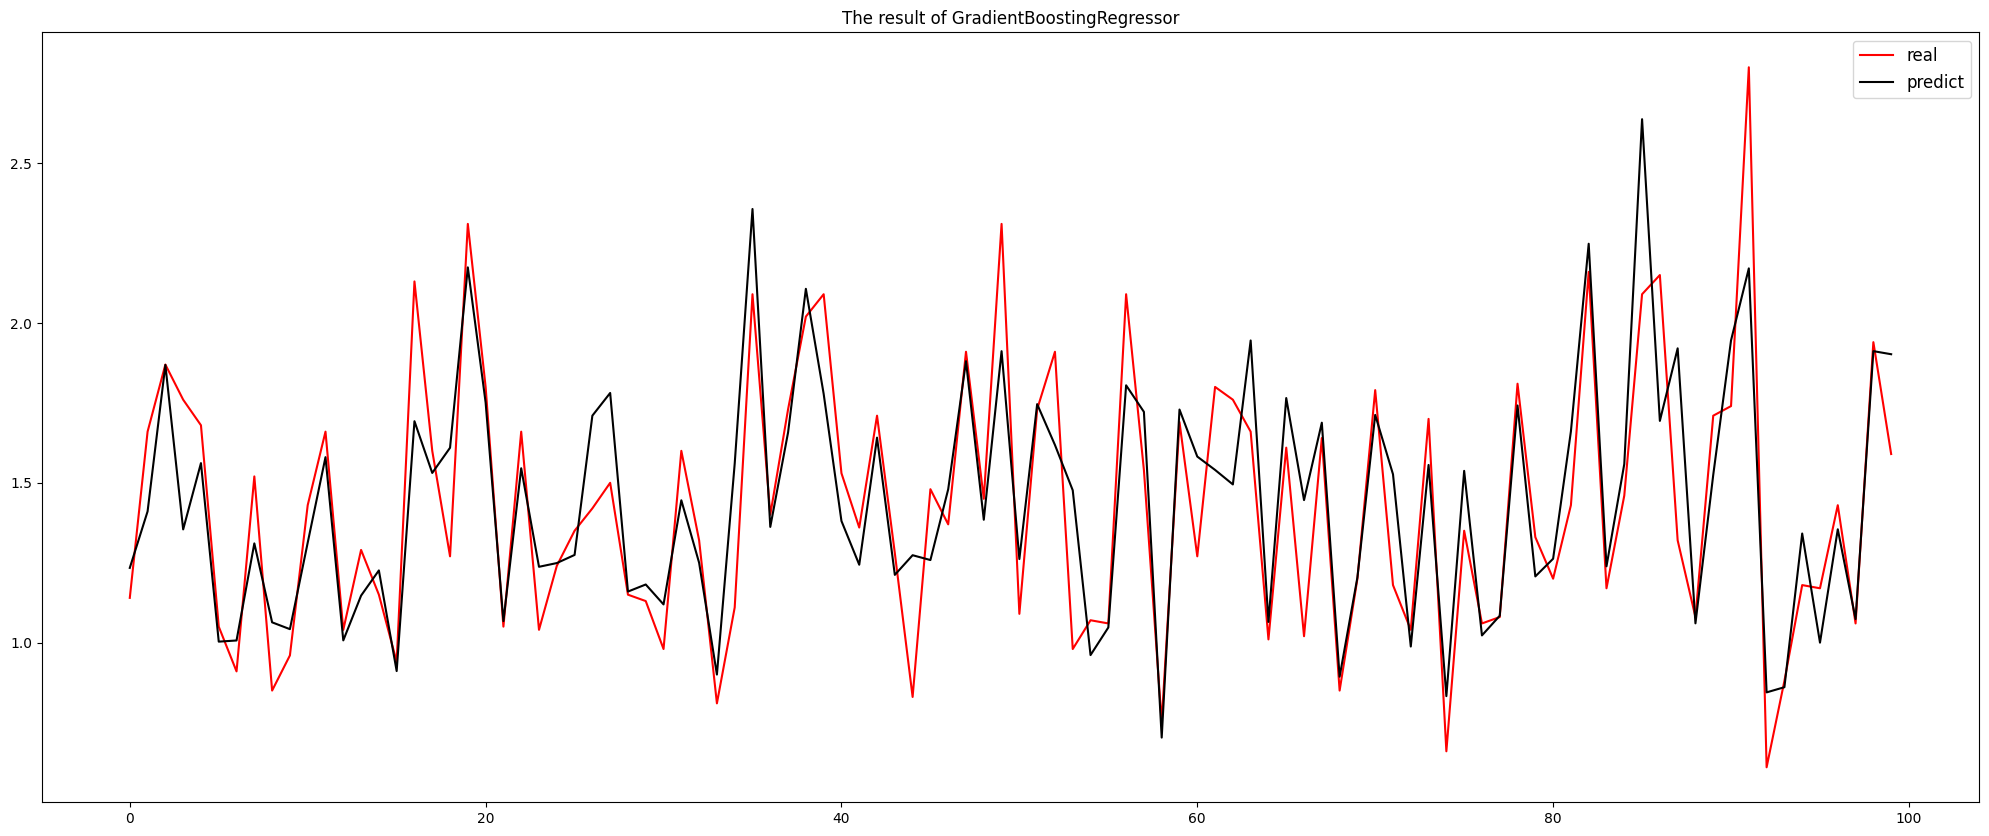

In [419]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Adding Scaler

In [420]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

## NN

In [422]:
nn_model = Sequential()

nn_model.add(Dense(7, input_dim=6, activation='relu'))
nn_model.add(Dense(3, activation='sigmoid'))
# nn_model.add(Dense(7, input_dim=5, activation='relu'))
# nn_model.add(Dense(3, activation='relu'))
# nn_model.add(Dense(1, activation='sigmoid'))


nn_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae', 'mse'])

nn_model_without_early=nn_model.fit(X_train, y_train, validation_split=0.35, epochs=30, batch_size=128)


Epoch 1/30


/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


75/75 [==============================] - 1s 6ms/step - loss: 0.8424 - mae: 0.8424 - mse: 0.9074 - val_loss: 0.8066 - val_mae: 0.8066 - val_mse: 0.8493
Epoch 2/30
75/75 [==============================] - 0s 3ms/step - loss: 0.7571 - mae: 0.7571 - mse: 0.7775 - val_loss: 0.7187 - val_mae: 0.7187 - val_mse: 0.7085
Epoch 3/30
75/75 [==============================] - 0s 3ms/step - loss: 0.6668 - mae: 0.6668 - mse: 0.6273 - val_loss: 0.6261 - val_mae: 0.6261 - val_mse: 0.5550
Epoch 4/30
75/75 [==============================] - 0s 3ms/step - loss: 0.5816 - mae: 0.5816 - mse: 0.4945 - val_loss: 0.5519 - val_mae: 0.5519 - val_mse: 0.4473
Epoch 5/30
75/75 [==============================] - 0s 2ms/step - loss: 0.5234 - mae: 0.5234 - mse: 0.4153 - val_loss: 0.5086 - val_mae: 0.5086 - val_mse: 0.3928
Epoch 6/30
75/75 [==============================] - 0s 2ms/step - loss: 0.4917 - mae: 0.4917 - mse: 0.3769 - val_loss: 0.4859 - val_mae: 0.4859 - val_mse: 0.3666
Epoch 7/30
75/75 [=====================

In [423]:
mse_result = nn_model_without_early.history.get("mse")[29]
print(mse_result)

0.3279433250427246


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


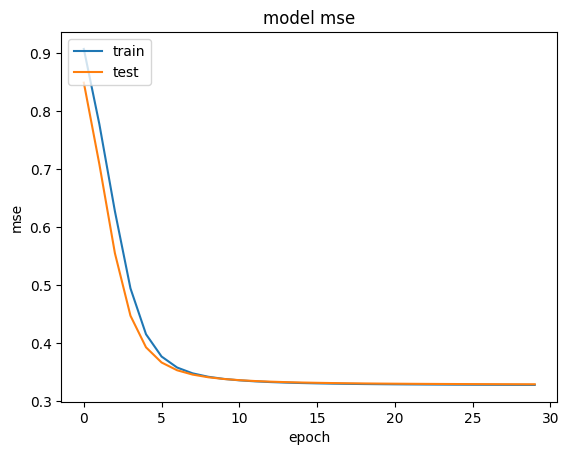

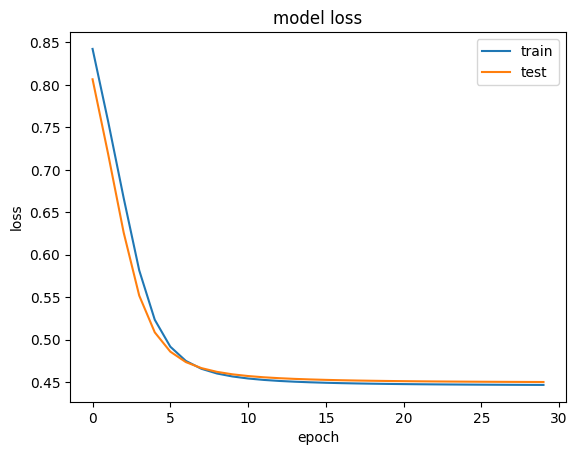

In [424]:
print(nn_model_without_early.history.keys())
# summarize history for accuracy
plt.plot(nn_model_without_early.history['mse'])
plt.plot(nn_model_without_early.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn_model_without_early.history['loss'])
plt.plot(nn_model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Check by RandomForestRegressor with scaling

#### Test set

In [425]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)

rfr_y_pred = rfr.predict(X_test)

test = print_evaluate_r_square_mse_mae(X_test, y_test, rfr_y_pred)

R-squared value of GradientBoostingRegressor: 0.3144469300207784
The mean squared error of GradientBoostingRegressor: 0.014925366324602743
The mean absoluate error of GradientBoostingRegressor: 0.08399092602739726


Text(0.5, 1.0, 'The result of RandomForestRegressor')

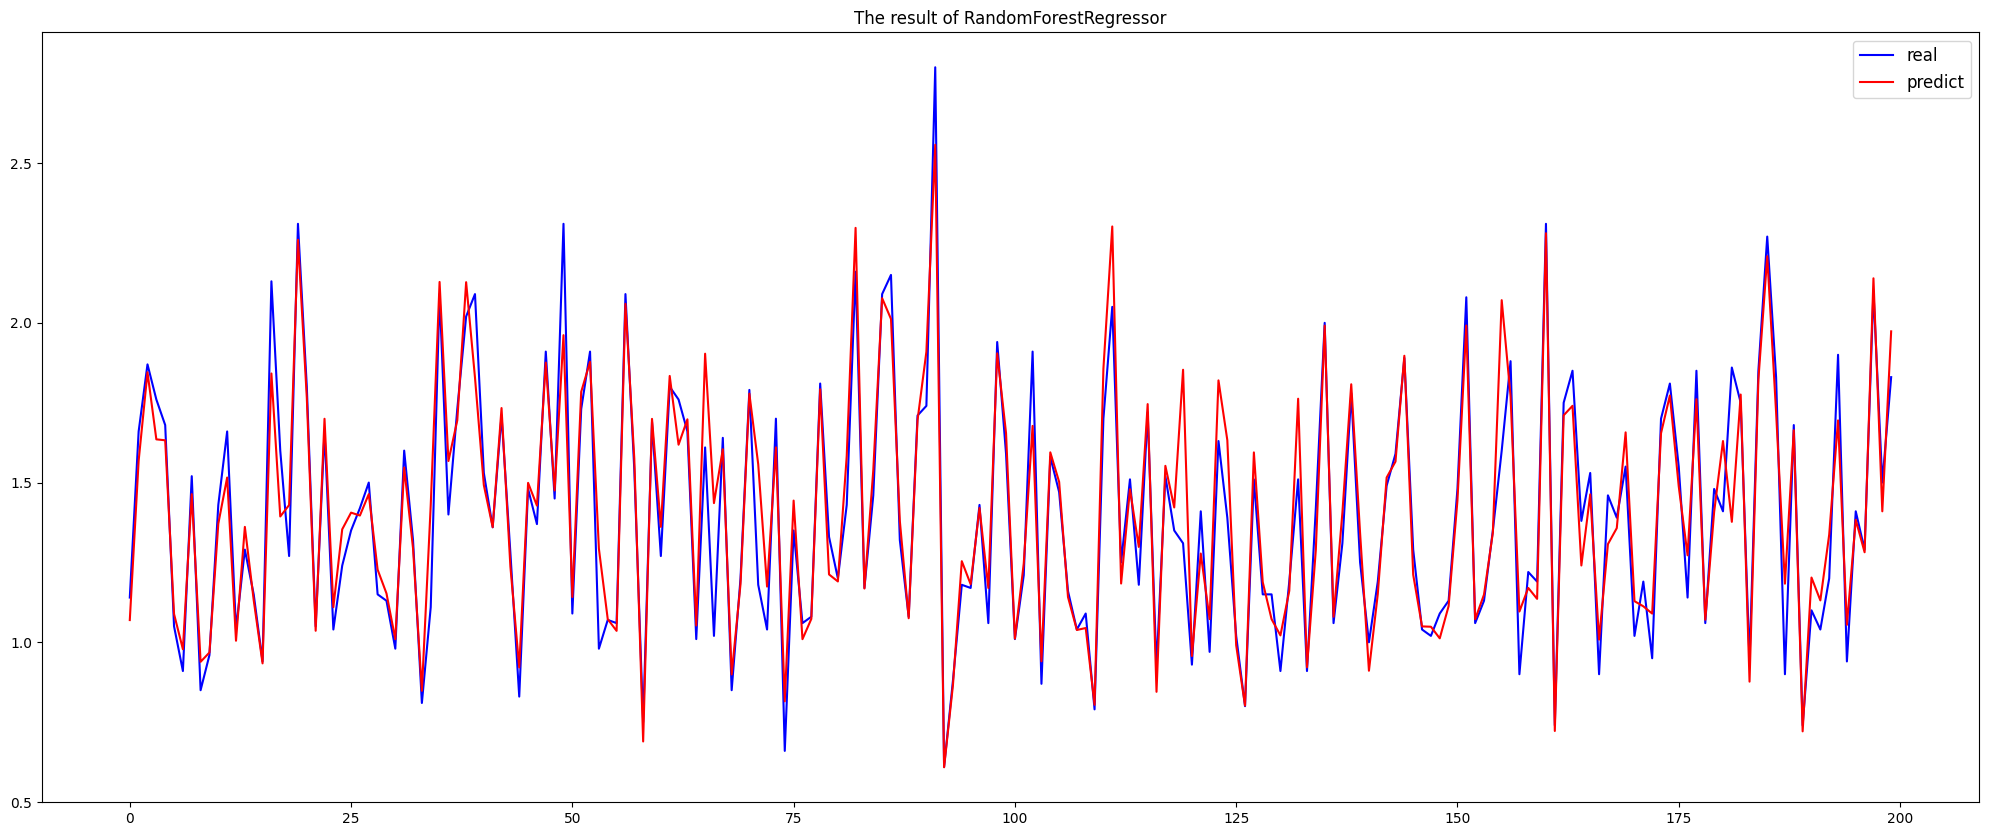

In [426]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_pred[:200],c='red')
plt.annotate(
    # Label and coordinate
    'outlier!',
    xy=(13, 62),
    xytext=(3, 65),
    # Custom arrow
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

#### Train set

In [427]:
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(n_estimators=200)  # maybe parameter tuning
rfr_reg.fit(X_train, y_train)

train_pred = rfr_reg.predict(X_train)


print('Testing set evaluation:\n______')
RandomForestRegressor_Yury_test = print_evaluate(y_test, rfr_y_pred)
print('==*******==')
print('Training set evaluation:\n_____')
RandomForestRegressor_Yury_train = print_evaluate(y_train, train_pred)




Testing set evaluation:
______
MAE: 0.08399092602739726
MSE: 0.014925366324602743
RMSE: 0.12216941648629882
R2 Square 0.9041154775965689
______
==*******==
Training set evaluation:
_____
MAE: 0.030634012743217323
MSE: 0.0019930456349342295
RMSE: 0.044643539677474385
R2 Square 0.9878278338812669
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

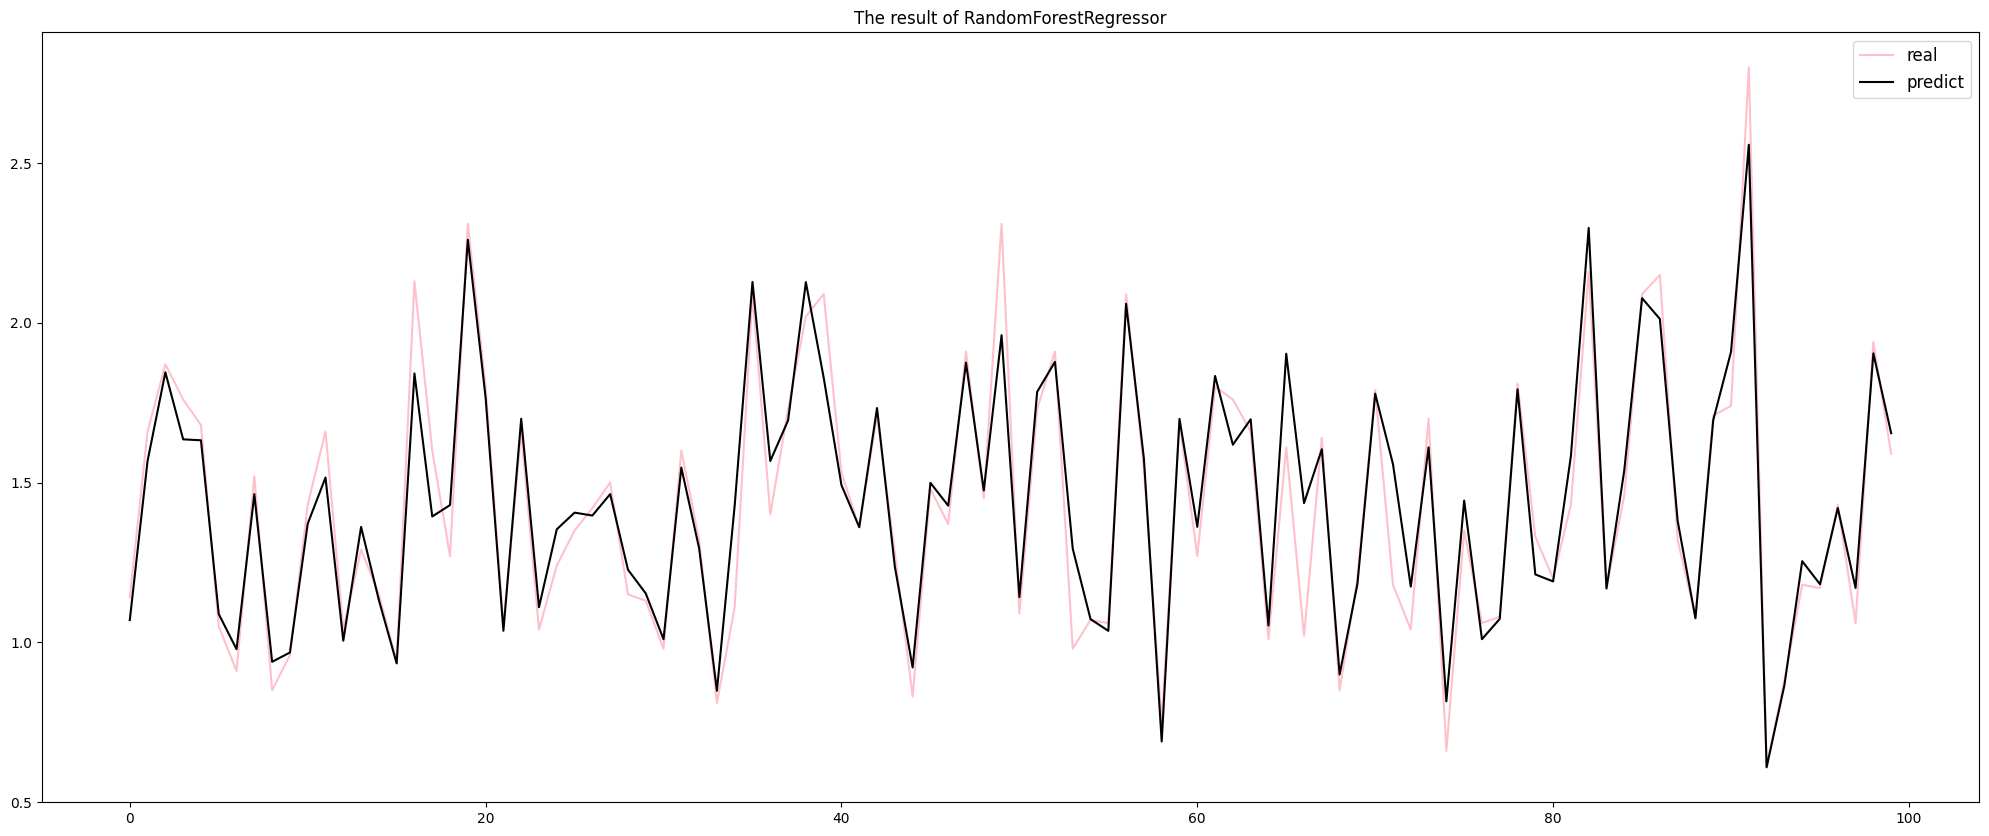

In [428]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(rfr_y_pred[:100],c='black')  #predicts
plt.annotate(
    # Label and coordinate
    'outlier!',
    xy=(13, 62),
    xytext=(3, 65),
    # Custom arrow
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

## Check by XGBoost regressor

In [429]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    objective ='reg:linear',
    colsample_bytree = 0.3,
    learning_rate = 0.1,
    max_depth = 5,
    alpha = 10,
    n_estimators = 10
)
xgb_reg.fit(X_train,y_train)

xgb_y_pred = xgb_reg.predict(X_test)

XGBoost_regressor_Yury = print_evaluate(y_test, xgb_y_pred)

[10:11:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.3580211254067617
MSE: 0.20715655627119903
RMSE: 0.4551445443715645
R2 Square -0.3308288070666243
______


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

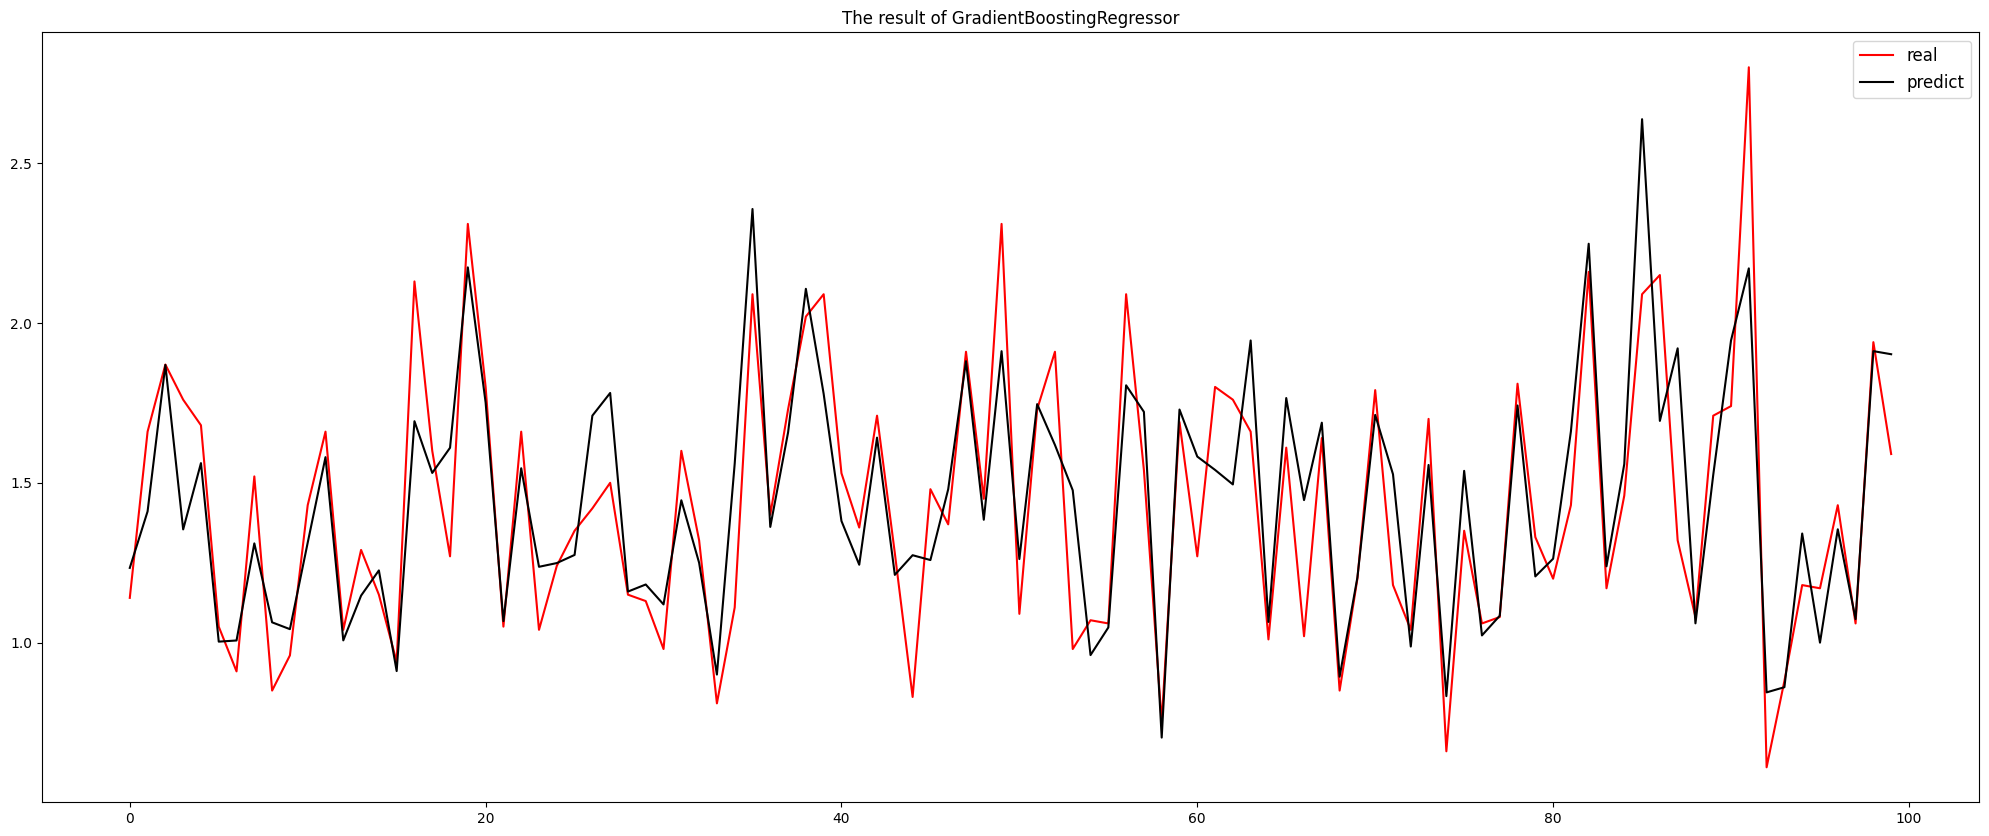

In [430]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Comparison of results before and after optimizations

* best values of metrics
* MAE -> 0.0
* MSE -> 0.0
* RMSE -> should be less 180
* R2 Square -> 1.0

#### LinearRegression

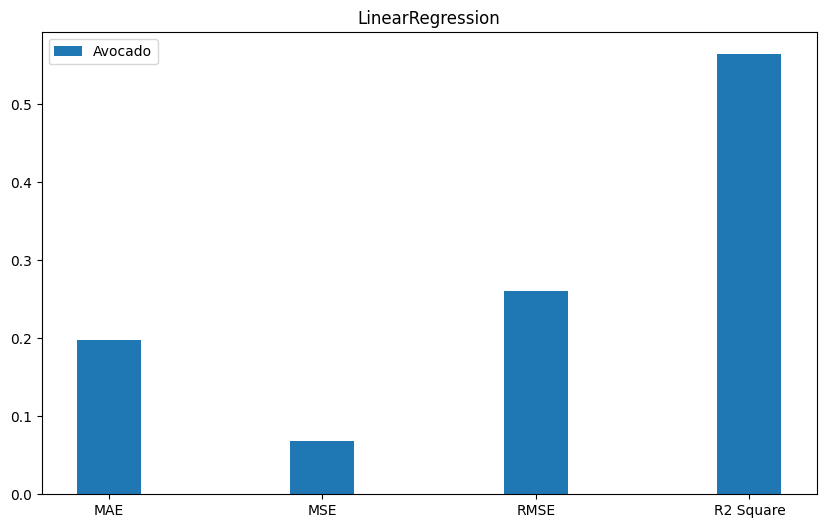

In [431]:
show_df(
    "LinearRegression",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        LinearRegression_Yury
    ]
)

#### GradientBoostingRegressor

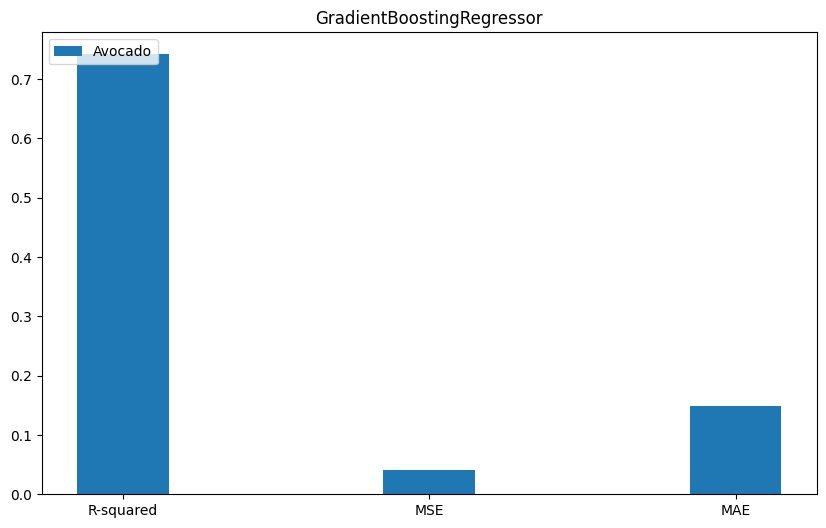

In [432]:
show_df(
    "GradientBoostingRegressor",
    ["R-squared", "MSE", "MAE"],
    [
        GradientBoostingRegressor_Yury
    ]
)

#### RandomForestRegressor - Test set

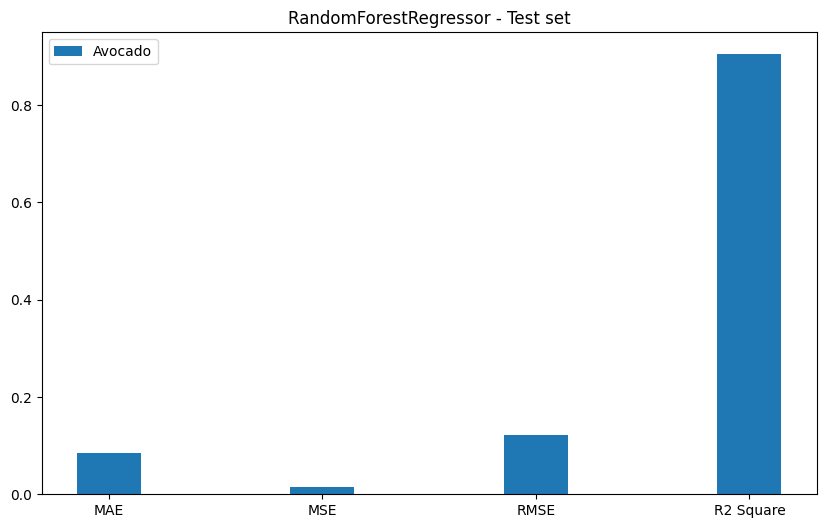

In [433]:
show_df(
    "RandomForestRegressor - Test set",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        RandomForestRegressor_Yury_test
    ]
)

#### RandomForestRegressor - Train set

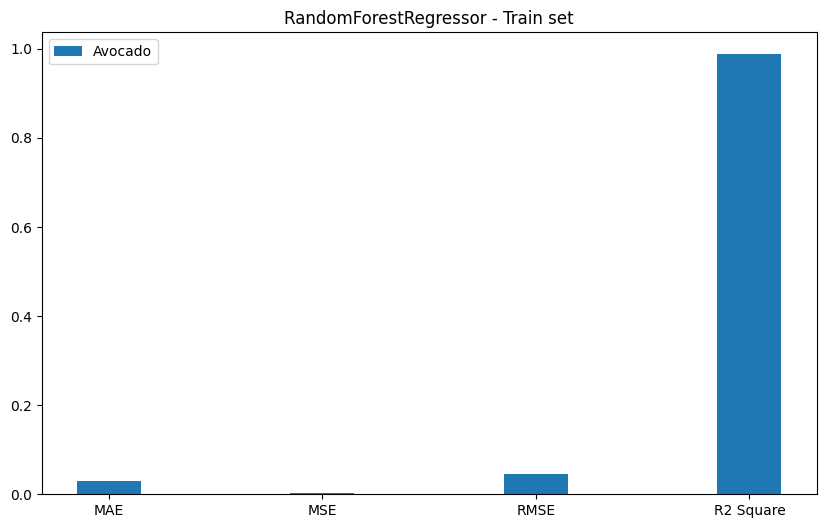

In [434]:
show_df(
    "RandomForestRegressor - Train set",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        RandomForestRegressor_Yury_train
    ]
)

## XGBoost regressor

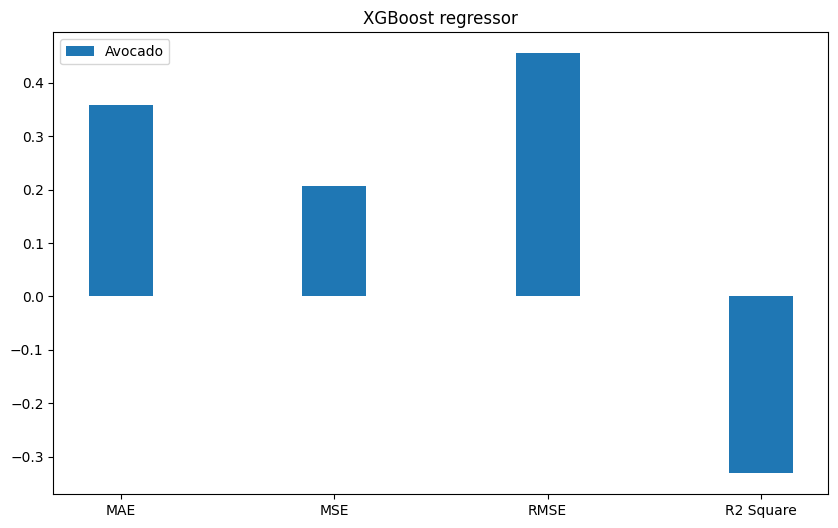

In [435]:
show_df(
    "XGBoost regressor",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        XGBoost_regressor_Yury
    ]
)